<a href="https://colab.research.google.com/github/AbdulSheffa/Spam-email/blob/main/MachineLearningCW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing necessary Libraries required**


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import csv
import seaborn as sns
%matplotlib inline


**Loading the dataset**

In [ ]:
dataset = pd.read_csv('spambase.data')

In [ ]:
dataset

,0,0.64,0.64.1,0.1,0.32,0.2,0.3,0.4,0.5,0.6,...,0.41,0.42,0.43,0.778,0.44,0.45,3.756,61,278,1
0,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
1,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
2,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.000,0.223,0.0,0.000,0.000,0.000,3.000,15,54,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88,0
4596,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14,0
4597,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118,0
4598,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78,0


 **Inserting the column names for the data set as per the instructions** 

---




In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 58 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       4600 non-null   float64
 1   0.64    4600 non-null   float64
 2   0.64.1  4600 non-null   float64
 3   0.1     4600 non-null   float64
 4   0.32    4600 non-null   float64
 5   0.2     4600 non-null   float64
 6   0.3     4600 non-null   float64
 7   0.4     4600 non-null   float64
 8   0.5     4600 non-null   float64
 9   0.6     4600 non-null   float64
 10  0.7     4600 non-null   float64
 11  0.64.2  4600 non-null   float64
 12  0.8     4600 non-null   float64
 13  0.9     4600 non-null   float64
 14  0.10    4600 non-null   float64
 15  0.32.1  4600 non-null   float64
 16  0.11    4600 non-null   float64
 17  1.29    4600 non-null   float64
 18  1.93    4600 non-null   float64
 19  0.12    4600 non-null   float64
 20  0.96    4600 non-null   float64
 21  0.13    4600 non-null   float64
 22  

In [ ]:
dataset.columns = ['word_freq_make','word_freq_address','word_freq_all','word_freq_3d','word_freq_our','word_freq_over','word_freq_remove','word_freq_internet','word_freq_order','word_freq_mail','word_freq_receive','word_freq_will','word_freq_people','word_freq_report','word_freq_addresses','word_freq_free','word_freq_business','word_freq_email','word_freq_you','word_freq_credit','word_freq_your','word_freq_font','word_freq_000','word_freq_money','word_freq_hp','word_freq_hpl','word_freq_george','word_freq_650','word_freq_lab','word_freq_labs','word_freq_telnet','word_freq_857','word_freq_data','word_freq_415','word_freq_85','word_freq_technology','word_freq_1999','word_freq_parts','word_freq_pm','word_freq_direct','word_freq_cs','word_freq_meeting','word_freq_original','word_freq_project','word_freq_re','word_freq_edu','word_freq_table','word_freq_conference','char_freq_;','char_freq_(','char_freq_[','char_freq_!','char_freq_$','char_freq_#','capital_run_length_average','capital_run_length_longest','capital_run_length_total','class']
dataset



,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
0,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
1,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
2,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.000,0.223,0.0,0.000,0.000,0.000,3.000,15,54,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88,0
4596,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14,0
4597,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118,0
4598,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78,0


In [ ]:
dataset.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
0,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
1,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
2,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.00,0.223,0.0,0.000,0.000,0.000,3.000,15,54,1


**Getting the sum of all the null values for each column**

In [ ]:
dataset.isna().sum()

word_freq_make                0
word_freq_address             0
word_freq_all                 0
word_freq_3d                  0
word_freq_our                 0
word_freq_over                0
word_freq_remove              0
word_freq_internet            0
word_freq_order               0
word_freq_mail                0
word_freq_receive             0
word_freq_will                0
word_freq_people              0
word_freq_report              0
word_freq_addresses           0
word_freq_free                0
word_freq_business            0
word_freq_email               0
word_freq_you                 0
word_freq_credit              0
word_freq_your                0
word_freq_font                0
word_freq_000                 0
word_freq_money               0
word_freq_hp                  0
word_freq_hpl                 0
word_freq_george              0
word_freq_650                 0
word_freq_lab                 0
word_freq_labs                0
word_freq_telnet              0
word_fre

In [ ]:
dataset = dataset.drop_duplicates()

In [ ]:
dataset.shape

(4209, 58)

In [ ]:
dataset.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
count,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,...,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.00000,4209.000000
mean,0.104391,0.112530,0.291390,0.063093,0.325322,0.096679,0.117503,0.108026,0.091882,0.248479,...,0.040413,0.144082,0.017380,0.281018,0.076075,0.045809,5.384282,52.137800,291.18508,0.398670
std,0.300036,0.454241,0.515752,1.352647,0.687887,0.276059,0.397327,0.410328,0.282174,0.656705,...,0.252562,0.274280,0.105743,0.843387,0.239734,0.435976,33.151287,199.605834,618.72831,0.489683
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.00000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.627000,7.000000,40.00000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.073000,0.000000,0.016000,0.000000,0.000000,2.297000,15.000000,101.00000,0.000000
75%,0.000000,0.000000,0.440000,0.000000,0.410000,0.000000,0.000000,0.000000,0.000000,0.190000,...,0.000000,0.194000,0.000000,0.331000,0.053000,0.000000,3.706000,44.000000,273.00000,1.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.00000,1.000000


**Removing the target variable**

In [ ]:
# class column contains the detail if the email is spam or not. 1 indicates spam while 0 indicates no-spam
remove_class = dataset.drop(columns=['class'])

In [ ]:
remove_class.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
count,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,...,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.00000
mean,0.104391,0.112530,0.291390,0.063093,0.325322,0.096679,0.117503,0.108026,0.091882,0.248479,...,0.034754,0.040413,0.144082,0.017380,0.281018,0.076075,0.045809,5.384282,52.137800,291.18508
std,0.300036,0.454241,0.515752,1.352647,0.687887,0.276059,0.397327,0.410328,0.282174,0.656705,...,0.298556,0.252562,0.274280,0.105743,0.843387,0.239734,0.435976,33.151287,199.605834,618.72831
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.00000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.627000,7.000000,40.00000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.073000,0.000000,0.016000,0.000000,0.000000,2.297000,15.000000,101.00000
75%,0.000000,0.000000,0.440000,0.000000,0.410000,0.000000,0.000000,0.000000,0.000000,0.190000,...,0.000000,0.000000,0.194000,0.000000,0.331000,0.053000,0.000000,3.706000,44.000000,273.00000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,10.000000,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.00000


**Seperating the target values**

In [ ]:
class_column = dataset['class'].values
class_column[0:5]

array([1, 1, 1, 1, 1])

In [ ]:
Scaler = StandardScaler()
new_data = Scaler.fit_transform(remove_class)
new_dataset = pd.DataFrame(data=new_data, columns=remove_class.columns)
new_dataset

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
0,0.352031,0.368724,0.404526,-0.04665,-0.269440,0.664145,0.232826,-0.092682,-0.325660,1.053140,...,-0.116421,-0.160030,-0.044057,-0.164384,0.107890,0.433554,0.005027,-0.008154,0.244823,1.190995
1,-0.147968,-0.247762,0.811747,-0.04665,1.315311,0.338089,0.182484,0.029186,1.942716,0.002316,...,-0.116421,-0.120431,-0.003947,-0.164384,-0.005950,0.450241,-0.082144,0.133848,2.168843,3.180796
2,-0.347968,-0.247762,-0.565048,-0.04665,0.442971,-0.350251,0.484538,1.272242,0.773085,0.581031,...,-0.116421,-0.160030,-0.025825,-0.164384,-0.170781,-0.317367,-0.105084,-0.055729,-0.060816,-0.161940
3,-0.347968,-0.247762,-0.565048,-0.04665,0.442971,-0.350251,0.484538,1.272242,0.773085,0.581031,...,-0.116421,-0.160030,-0.033118,-0.164384,-0.173153,-0.317367,-0.105084,-0.055729,-0.060816,-0.161940
4,-0.347968,-0.247762,-0.565048,-0.04665,2.216730,-0.350251,-0.295769,4.245828,-0.325660,-0.378418,...,-0.116421,-0.160030,0.287760,-0.164384,-0.333241,-0.317367,-0.105084,-0.071930,-0.186078,-0.383388
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,0.685363,-0.247762,0.637223,-0.04665,-0.472986,0.772830,-0.295769,-0.263298,-0.325660,-0.378418,...,-0.116421,-0.160030,0.320577,-0.164384,-0.333241,-0.317367,-0.105084,-0.127983,-0.246203,-0.328430
4205,-0.347968,-0.247762,-0.565048,-0.04665,-0.472986,-0.350251,-0.295769,-0.263298,-0.325660,-0.378418,...,-0.116421,-0.160030,-0.525374,-0.164384,0.085359,-0.317367,-0.105084,-0.115523,-0.241193,-0.448045
4206,0.652030,-0.247762,0.016696,-0.04665,-0.472986,-0.350251,-0.295769,-0.263298,-0.325660,-0.378418,...,-0.116421,0.243879,2.092699,-0.164384,-0.333241,-0.317367,-0.105084,-0.120078,-0.231172,-0.279938
4207,2.852026,-0.247762,-0.565048,-0.04665,-0.007738,-0.350251,-0.295769,-0.263298,-0.325660,-0.378418,...,-0.116421,-0.160030,-0.317532,-0.164384,-0.333241,-0.317367,-0.105084,-0.127832,-0.236182,-0.344595


In [ ]:
new_dataset.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
count,4.209000e+03,4209.000000,4.209000e+03,4.209000e+03,4.209000e+03,4209.000000,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,...,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03
mean,-2.025781e-17,0.000000,-4.051562e-17,-1.350521e-17,5.402083e-17,0.000000,-2.701042e-17,5.402083e-17,2.701042e-17,1.350521e-17,...,-1.350521e-17,-4.051562e-17,6.752604e-18,2.025781e-17,-4.051562e-17,8.103125e-17,6.752604e-18,2.025781e-17,2.701042e-17,5.402083e-17
std,1.000119e+00,1.000119,1.000119e+00,1.000119e+00,1.000119e+00,1.000119,1.000119e+00,1.000119e+00,1.000119e+00,1.000119e+00,...,1.000119e+00,1.000119e+00,1.000119e+00,1.000119e+00,1.000119e+00,1.000119e+00,1.000119e+00,1.000119e+00,1.000119e+00,1.000119e+00
min,-3.479680e-01,-0.247762,-5.650479e-01,-4.664991e-02,-4.729856e-01,-0.350251,-2.957690e-01,-2.632980e-01,-3.256596e-01,-3.784178e-01,...,-1.164211e-01,-1.600299e-01,-5.253738e-01,-1.643841e-01,-3.332409e-01,-3.173668e-01,-1.050837e-01,-1.322665e-01,-2.562244e-01,-4.690582e-01
25%,-3.479680e-01,-0.247762,-5.650479e-01,-4.664991e-02,-4.729856e-01,-0.350251,-2.957690e-01,-2.632980e-01,-3.256596e-01,-3.784178e-01,...,-1.164211e-01,-1.600299e-01,-5.253738e-01,-1.643841e-01,-3.332409e-01,-3.173668e-01,-1.050837e-01,-1.133509e-01,-2.261615e-01,-4.060182e-01
50%,-3.479680e-01,-0.247762,-5.650479e-01,-4.664991e-02,-4.729856e-01,-0.350251,-2.957690e-01,-2.632980e-01,-3.256596e-01,-3.784178e-01,...,-1.164211e-01,-1.600299e-01,-2.591909e-01,-1.643841e-01,-3.142675e-01,-3.173668e-01,-1.050837e-01,-9.313814e-02,-1.860778e-01,-3.074171e-01
75%,-3.479680e-01,-0.247762,2.881769e-01,-4.664991e-02,1.231135e-01,-0.350251,-2.957690e-01,-2.632980e-01,-3.256596e-01,-8.906033e-02,...,-1.164211e-01,-1.600299e-01,1.820165e-01,-1.643841e-01,5.927098e-02,-9.626226e-02,-1.050837e-01,-5.063097e-02,-4.077419e-02,-2.939455e-02
max,1.478534e+01,31.193013,9.324604e+00,3.160616e+01,1.406601e+01,20.952071,1.800369e+01,2.681583e+01,1.831755e+01,2.730852e+01,...,3.338210e+01,1.720410e+01,3.503375e+01,3.843384e+01,3.818036e+01,2.472585e+01,4.538220e+01,3.309814e+01,4.978834e+01,2.513488e+01


**Principal Component Analysis**

In [ ]:
from sklearn.decomposition import PCA

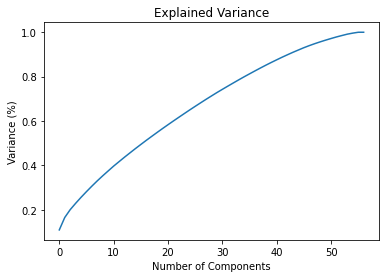

In [ ]:
principal_component_analysis = PCA()
principal_components = principal_component_analysis.fit_transform(new_dataset)
plt.figure()
plt.plot(np.cumsum(principal_component_analysis.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Explained Variance')
plt.show()

In [ ]:
# it is visible that 90% of variance is observed between 40 to 50 number of principal components
principal_component_analysis = PCA(n_components=45)
final_data = principal_component_analysis.fit_transform(new_dataset)
principal_data = pd.DataFrame(data=final_data, columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9',
                                                        'PC10','PC11','PC12','PC13','PC14','PC15','PC16','PC17','PC18',
                                                        'PC19','PC20','PC21','PC22','PC23','PC24','PC25','PC26','PC27',
                                                        'PC28','PC29','PC30','PC31','PC32','PC33','PC34','PC35','PC36',
                                                        'PC37','PC38','PC39','PC40','PC41','PC42','PC43','PC44','PC45'])
principal_data


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC36,PC37,PC38,PC39,PC40,PC41,PC42,PC43,PC44,PC45
0,-1.293656,2.006808,0.071161,-0.481186,-0.099412,-1.117910,-0.544345,0.251966,-0.308275,-0.631398,...,-0.130056,-0.475425,-0.186851,0.133714,0.074358,0.250285,0.543438,0.012955,0.316217,0.059978
1,-1.612838,4.821007,3.136746,-1.074385,1.592178,-1.499245,-3.174038,-1.399996,1.025573,2.520177,...,-0.033684,-0.725670,-0.288633,-0.301486,0.944777,0.862636,0.553554,0.302144,-0.750408,0.564364
2,-0.857356,0.414016,-0.551745,-0.030984,-0.050583,0.702415,0.339879,-0.444579,-0.365867,0.183113,...,-0.072663,0.058217,0.258768,-0.309746,0.480248,0.800996,-0.628812,0.338934,-0.306203,-0.441044
3,-0.858209,0.413349,-0.553869,-0.031243,-0.050611,0.703031,0.338130,-0.445859,-0.366208,0.182712,...,-0.072582,0.059852,0.259292,-0.309820,0.480698,0.800141,-0.627432,0.338836,-0.305225,-0.440769
4,-0.496912,-0.506521,-0.353647,0.492880,0.357925,1.201187,0.406598,-1.056232,-0.752499,1.234054,...,-0.285873,0.277140,0.080164,0.199434,1.864045,1.117241,-1.259002,0.951408,0.165100,-0.124859
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,-0.442848,-0.886753,-0.100421,0.567850,0.225288,-0.788767,0.143156,-0.209686,-0.079085,-0.130232,...,0.192075,0.133264,-0.484520,-0.072558,0.185548,-0.584867,-0.350434,0.219732,-0.148250,0.262394
4205,-0.806761,-0.660538,-1.122699,-0.493330,-1.024696,-0.528509,0.880791,0.773879,-0.551976,0.641604,...,-0.761072,0.515515,0.432846,0.886185,-1.210081,0.663334,0.513784,0.401439,-0.217596,-0.017892
4206,-0.276049,-0.567567,0.359544,0.162741,-0.020029,-0.955039,0.270302,0.331851,0.242640,0.221113,...,-0.022335,0.016593,-0.619385,0.477004,-0.647655,-0.362387,-0.980919,0.371349,-0.228736,0.053548
4207,-0.585895,-0.749525,-0.464930,0.290646,-0.277571,-0.760531,0.432698,0.115618,-0.367128,-0.614845,...,-0.695229,-0.137085,0.304448,-0.025609,-0.363085,0.697240,-0.393121,0.196453,0.205919,-0.077461


In [ ]:
#these are all the columns from the dataset that under went PCA
x_set = principal_data.iloc[:,0:45].values

#this is the target coloumn from the initial dataset
y_set = dataset.iloc[:,57].values

**Training the KNN model**

In [ ]:

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_set,y_set, test_size=0.30, random_state=42)
print(f"X Training: {x_train}\n X Test: {x_test}\n Y Train: {y_train}\n Y Test: {y_test}")

X Training: [[-7.75703514e-01 -1.48598838e-01 -6.34195005e-01 ... -1.40280109e-01
   5.48102165e-01 -2.01089031e-01]
 [ 1.22761096e-01 -6.34670229e-01 -1.20907641e+00 ...  6.42415577e-01
   3.13994526e-02  5.22332252e-01]
 [ 2.07880755e+00 -1.19683514e+00  5.70717926e-02 ...  1.24831797e+00
  -9.16148725e-01 -2.28981970e-03]
 ...
 [ 9.72834425e-01 -4.26139072e+00  3.40820349e+00 ... -1.52270145e+00
  -3.86269731e-01  8.13558432e-01]
 [-4.57284835e-01 -1.03273572e+00  3.74879944e-02 ...  1.60336553e-01
  -4.13814764e-01  2.32253217e-01]
 [-1.10297103e+00  9.62758133e-01 -1.19955894e+00 ...  1.26037409e-01
   5.46062703e-01  6.29501433e-01]]
 X Test: [[-0.47910038 -0.89900487 -0.10915895 ... -0.91171106 -0.69381636
   0.19905553]
 [-0.77056001  1.13982062 -0.89111383 ... -1.01080878 -0.4326624
   0.36465477]
 [-0.1470744  -1.41219117  0.36000437 ... -0.58223986 -0.32871089
  -0.05442278]
 ...
 [-0.2028512  -3.97097165  2.61180061 ...  6.03339568 -2.06129502
   7.46057733]
 [-1.10221423  

In [ ]:
# feature scalling
featureScalling = StandardScaler()
x_train = featureScalling.fit_transform(x_train)
x_test = featureScalling.transform(x_test)

In [ ]:
# fitting the classifier to the training set
# k is considered as 5
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
classifier.fit(x_train,y_train)

KNeighborsClassifier()

In [40]:
#predicting test results
predicted_y = classifier.predict(x_test)
predicted_y

array([0, 1, 0, ..., 0, 1, 0])

**Classification report for the KNN model**

In [ ]:
from sklearn.metrics import classification_report
print("Below is the classifcation report: ")
print(classification_report(y_test,predicted_y))

Below is the classifcation report: 
              precision    recall  f1-score   support

           0       0.87      0.94      0.90       740
           1       0.90      0.80      0.85       523

    accuracy                           0.88      1263
   macro avg       0.89      0.87      0.88      1263
weighted avg       0.88      0.88      0.88      1263



In [ ]:
from sklearn.metrics import confusion_matrix
ConfusionMatrix = confusion_matrix(y_test, predicted_y)
ConfusionMatrix

array([[696,  44],
       [105, 418]])

**Visualizing the confusion Matrix**

Text(91.68, 0.5, 'predicted class')

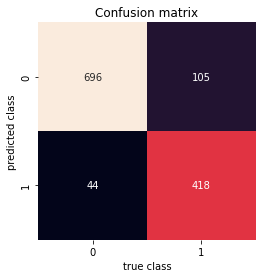

In [ ]:
import seaborn as sns

Matrix = confusion_matrix(y_test, predicted_y)
sns.heatmap(Matrix.T, square=True, annot=True, fmt='d', cbar=False)

plt.title('Confusion matrix')
plt.xlabel('true class')
plt.ylabel('predicted class')

**Accuracy of the model in %**

In [ ]:
from sklearn.metrics import accuracy_score
print("Using KNN model the accuracy is : ",accuracy_score(predicted_y,y_test)*100)

Using KNN model the accuracy is :  88.20269200316706


**Decision Tree model**

In [ ]:
# decision tree implementation
x_set = principal_data.iloc[:,0:45].values
y_set = dataset.iloc[:,57].values

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_set,y_set, test_size=0.30, random_state=42)
print(f"X Training: {x_train}\n X Test: {x_test}\n Y Train: {y_train}\n Y Test: {y_test}")

X Training: [[-7.75703514e-01 -1.48598838e-01 -6.34195005e-01 ... -1.40280109e-01
   5.48102165e-01 -2.01089031e-01]
 [ 1.22761096e-01 -6.34670229e-01 -1.20907641e+00 ...  6.42415577e-01
   3.13994526e-02  5.22332252e-01]
 [ 2.07880755e+00 -1.19683514e+00  5.70717926e-02 ...  1.24831797e+00
  -9.16148725e-01 -2.28981970e-03]
 ...
 [ 9.72834425e-01 -4.26139072e+00  3.40820349e+00 ... -1.52270145e+00
  -3.86269731e-01  8.13558432e-01]
 [-4.57284835e-01 -1.03273572e+00  3.74879944e-02 ...  1.60336553e-01
  -4.13814764e-01  2.32253217e-01]
 [-1.10297103e+00  9.62758133e-01 -1.19955894e+00 ...  1.26037409e-01
   5.46062703e-01  6.29501433e-01]]
 X Test: [[-0.47910038 -0.89900487 -0.10915895 ... -0.91171106 -0.69381636
   0.19905553]
 [-0.77056001  1.13982062 -0.89111383 ... -1.01080878 -0.4326624
   0.36465477]
 [-0.1470744  -1.41219117  0.36000437 ... -0.58223986 -0.32871089
  -0.05442278]
 ...
 [-0.2028512  -3.97097165  2.61180061 ...  6.03339568 -2.06129502
   7.46057733]
 [-1.10221423  

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier_decision_tree = DecisionTreeClassifier(random_state=45,max_depth=5)
classifier_decision_tree.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5, random_state=45)

**Getting the predictions**

In [ ]:
prediction = classifier_decision_tree.predict(x_test)
prediction

array([0, 1, 0, ..., 0, 1, 0])

**Decision tree graph**


In [ ]:
tree.plot_tree(classifier_decision_tree)

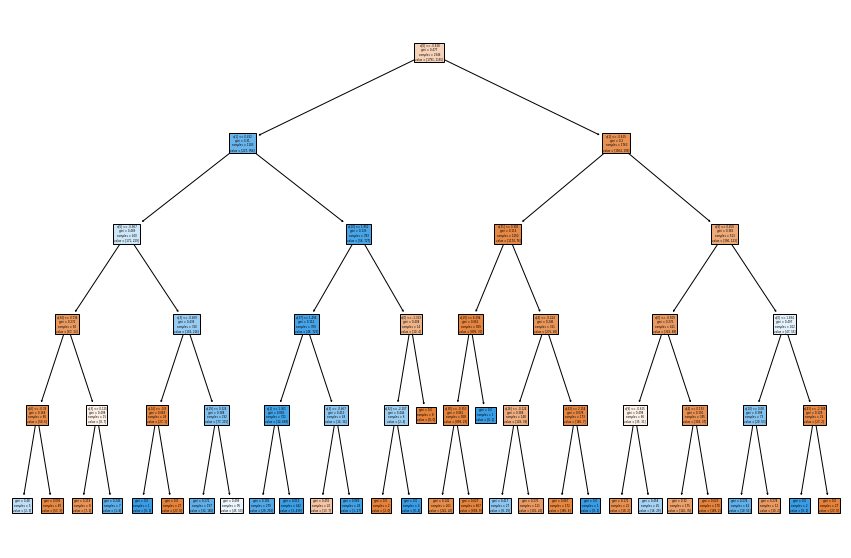

In [ ]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(classifier_decision_tree,filled=True)
plt.show()

**Classificiation report using the use of Decision Tree**

In [ ]:
from sklearn.metrics import classification_report
print("Below is the classifcation report: ")
print(classification_report(y_test,prediction))

Below is the classifcation report: 
              precision    recall  f1-score   support

           0       0.90      0.89      0.89       740
           1       0.84      0.86      0.85       523

    accuracy                           0.87      1263
   macro avg       0.87      0.87      0.87      1263
weighted avg       0.88      0.87      0.88      1263



**Confusion Matrix for the use of Decision Tree**

In [ ]:
from sklearn.metrics import confusion_matrix
print("Below is the confusion matrix: ")
Confusion_Matrix = confusion_matrix(y_test, prediction)
Confusion_Matrix

Below is the confusion matrix: 


array([[655,  85],
       [ 73, 450]])

**Visualizing the confusion matrix**

Text(91.68, 0.5, 'Predicted Class')

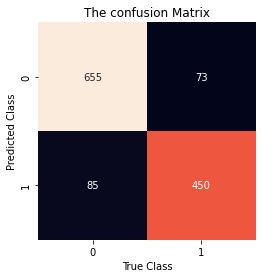

In [ ]:
sns.heatmap(Confusion_Matrix.T, square=True, annot=True, fmt='d', cbar=False)
plt.title("The confusion Matrix")
print("")
plt.xlabel("True Class")
plt.ylabel("Predicted Class")

**Accuracy of the model in %**

In [ ]:
from sklearn.metrics import accuracy_score
print("Using Decision Trees model the accuracy is : ",accuracy_score(prediction,y_test)*100)

Using Decision Trees model the accuracy is :  87.49010292953285


**Visualizing the accuracy comparison of both KNN and Decision Tree Models**

Using KNN model the accuracy is :  89.39034045922408
Using Decision Trees model the accuracy is :  87.49010292953285



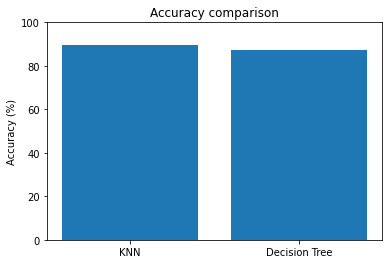

In [64]:
# the comparison of accuracy between both KNN and Decision tree model
knn_accuracy = accuracy_score(predicted_y,y_test)*100
print("Using KNN model the accuracy is : ",knn_accuracy)

Decision_Tree_Accuracy = accuracy_score(prediction,y_test)*100
print("Using Decision Trees model the accuracy is : ", Decision_Tree_Accuracy)
print("")
#visualizing the comparison
plt.bar(['KNN', 'Decision Tree'],[knn_accuracy,Decision_Tree_Accuracy])

#since the accuracy is calculated interms of percentage, we will set the y limit from 0 to 100
plt.ylim(0,100)
plt.title("Accuracy comparison")
plt.ylabel("Accuracy (%)")
plt.plot()
plt.show()


